In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [56]:
z = np.load('data/dsprites/factors_gp_full_init_5000.npy')
z_orig = np.load('data/dsprites/factors_5000.npy')

In [57]:
z.shape

(5000, 10, 6)

In [60]:
z_correct = np.transpose(z, (0,2,1))
np.save('data/dsprites/factors_gp_full_init_5000.npy',z_correct)
z_correct.shape

(5000, 6, 10)

In [59]:
i = 47
print(z[i,:,:])
print(z_correct[i,:,:])

[[ 0.  1.  5. 10. 19. 16.]
 [ 0.  1.  5. 12. 20. 15.]
 [ 0.  1.  5. 14. 19. 15.]
 [ 0.  1.  5. 16. 18. 14.]
 [ 0.  1.  5. 18. 16. 13.]
 [ 0.  1.  5. 19. 14. 13.]
 [ 0.  1.  5. 21. 14. 13.]
 [ 0.  1.  5. 22. 14. 14.]
 [ 0.  1.  5. 23. 15. 15.]
 [ 0.  1.  5. 24. 16. 16.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [10. 12. 14. 16. 18. 19. 21. 22. 23. 24.]
 [19. 20. 19. 18. 16. 14. 14. 14. 15. 16.]
 [16. 15. 15. 14. 13. 13. 13. 14. 15. 16.]]


## Baseline quickcheck

In [6]:
beta_dci_path = 'factorvae_64_dci_aggr.npy'
beta_dci = np.load(beta_dci_path)

In [7]:
beta_dci.shape
beta_D = beta_dci[0,:]
beta_C = beta_dci[1,:]
beta_I = beta_dci[2,:]

print('D mean: {}'.format(np.mean(beta_D)))
print('C mean: {}'.format(np.mean(beta_C)))
print('I mean: {}'.format(np.mean(beta_I)))

D mean: 0.10969459265470505
C mean: 0.10013113915920258
I mean: 0.23790740966796875


{'bodies': [<matplotlib.collections.PolyCollection at 0x2aea6d98eed0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x2aea6d98ed90>,
 'cmins': <matplotlib.collections.LineCollection at 0x2aea6d99c550>,
 'cbars': <matplotlib.collections.LineCollection at 0x2aea6d99c210>}

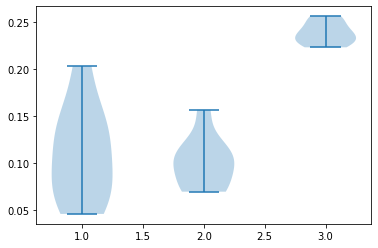

In [13]:
plt.violinplot(beta_dci.transpose())

## Aggregate DCI check

In [2]:
dci_test = np.load('gpvae_tensor2_dci_aggr.npy')

In [3]:
dci_test.shape
D = dci_test[0,:,:]
C = dci_test[1,:,:]
I = dci_test[2,:,:]

D_mean = np.mean(D,0)
D_var = np.var(D,0)
C_mean = np.mean(C,0)
C_var = np.var(C,0)
I_mean = np.mean(I,0)
I_var = np.var(I,0)

print('D mean: {}'.format(D_mean))
print('D var: {}'.format(D_var))
print('C mean: {}'.format(C_mean))
print('C var: {}'.format(C_var))
print('I mean: {}'.format(I_mean))
print('I var: {}'.format(I_var))

D mean: [0.05645033 0.13795963 0.10855176 0.0956778  0.13954079]
D var: [0.00115435 0.00583437 0.00543033 0.00447321 0.00522757]
C mean: [0.08907302 0.21229026 0.16958536 0.1381446  0.1435526 ]
C var: [0.00226907 0.00801962 0.01275972 0.00845694 0.00524944]
I mean: [0.3379333  0.39785    0.34866664 0.3188     0.35395   ]
I var: [0.01742106 0.01132975 0.01874939 0.02441391 0.01875024]


In [4]:
print("{}".format(D))

[[2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
  2.22044605e-16]
 [9.43224654e-02 1.11676179e-01 2.08109334e-01 1.96708098e-01
  1.81446522e-01]
 [5.69555983e-02 1.47955582e-01 9.90143493e-02 1.09747000e-01
  1.92949235e-01]
 [6.37337640e-02 1.97804198e-01 9.67755169e-02 1.34442896e-01
  1.48665518e-01]
 [2.34202500e-02 2.29279429e-01 1.21212415e-01 1.24947906e-01
  2.07177594e-01]
 [8.03133771e-02 9.93645340e-02 1.03320435e-01 1.30188748e-01
  1.61524355e-01]
 [7.62808472e-02 6.88166097e-02 9.52169895e-02 2.22044605e-16
  1.46839201e-01]
 [2.22044605e-16 7.60844201e-02 2.22044605e-16 2.22044605e-16
  2.22044605e-16]
 [8.85143727e-02 2.52490699e-01 1.11109443e-01 1.51661992e-01
  1.94353387e-01]
 [8.09625611e-02 1.96124554e-01 2.50759095e-01 1.09081335e-01
  1.62452161e-01]]


In [23]:
dim = 64
n = 3
single_dci_path = 'models/dsprites_dim_{}/200413_dsprites_{}_n{}/dci_6_{}_1000.npz'.format(dim,dim,n,dim)
single_debug = np.load(single_dci_path)

In [24]:
print('D: {}'.format(single_debug['disentanglement']))
print('C: {}'.format(single_debug['completeness']))
print('I: {}'.format(single_debug['informativeness_test']))

D: 2.220446049250313e-16
C: -1.3322676295501878e-15
I: 0.08033333333333333


## Check from_tensor_slice single run


In [55]:
dim = 32
dci_debug_path = 'models/dsprites_dim_{}_debug2/200416_dsprites_{}_debug_n1/dci_6_{}_1000.npz'.format(dim,dim,dim)
dci_debug = np.load(dci_debug_path)

FileNotFoundError: [Errno 2] No such file or directory: 'models/dsprites_dim_32_debug2/200416_dsprites_32_debug_n1/dci_6_32_1000.npz'

In [56]:
dci_debug.files
print('D: {}'.format(dci_debug['disentanglement']))
print('C: {}'.format(dci_debug['completeness']))
print('I: {}'.format(dci_debug['informativeness_test']))

D: 0.07861402197797596
C: 0.16294512357704616
I: 0.4146666666666667


In [25]:
def save_z_c(underlying_factors, latent_factors, filename):
    """
    Save underlying factors and latent factors to calculate DCI score.
    """
    z = underlying_factors
    c = latent_factors
    np.savez(filename, z=z, c=c)

In [9]:
model_path = 'models/200322_reproduce_dsprites_test1/'
z_path = model_path + 'z_mean.npy'

In [18]:
factors_path = '/cluster/home/bings/GP-VAE/data/dsprites/factors_5000.npy'
factors = np.load(factors_path)
factors_test = factors[4000:]

In [11]:
z_mean = np.load(z_path)

In [23]:
print(z_mean.shape)

(1000, 256, 10)


In [20]:
 print(factors_test.shape)

(1000, 6, 10)


In [27]:
save_z_c(factors_test, z_mean, 'z_c_5000')